In [55]:
# Importing necessary libraries
import numpy as np  
import matplotlib.pyplot as plt  
import scipy 
import math  


# finite difference method to calculate the second derivative of a function
def d2f(f, dz, Nz):
    sol = np.zeros((Nz))  # Initialize solution array
    for i in range(1, Nz - 2):
        sol[i] = (f[i - 1] - 2 * f[i] + f[i + 1]) / (dz * dz)
    # Apply boundary conditions at i=0
    sol[0] = (2 * f[0] - 5 * f[1] + 4 * f[2] - f[3]) / (dz * dz)
    # Apply boundary conditions at i=Nz-1
    sol[Nz - 1] = (2 * f[Nz - 1] - 5 * f[Nz - 2] + 4 * f[Nz - 3] - f[Nz - 4]) / (dz * dz)
    return sol

# Function to call the second derivative function
def ddf(f,dz,Nz):
    return d2f(f,dz,Nz)

# Runge-Kutta method for time stepping
def solve(f,ddf,dz,Nz,dt,Nt,initfn,time_plot):
    f_plot=[f]  # Initialize array to store function values for plotting
    # f_nzby2 = [f[int(Nz/2)]]  # Initialize array to store function values at Nz/2

    # Time stepping loop
    for j in range(1,Nt+1):
        # Calculate Runge-Kutta coefficients
        k1 = ddf(f, dz, Nz)
        k2 = ddf(f, dz, Nz)
        k3 = ddf(f, dz, Nz) 
        k4 = ddf(f, dz, Nz) 
        # Update function values
        f = f + ((dt / 6.0) * (k1 +( 2 * k2) + (2 * k3) + k4))
        # Apply boundary conditions
        f[0]=initfn(z0,j)
        f[Nz-1]=initfn(zf,j)
        print(f[0],f[Nz-1])
        
        # Store function value at Nz/2
        # f_nzby2.append(f[int(Nz/2)])

        # Store function values for specified time steps
        if j in time_plot:
            f_plot.append(f)

    # Return arrays for plotting
    return np.array(f_plot)

In [56]:
def initfn(z,t):
    def expression(n,z,t):
        return ((-1)**(n-1))/(2*n-1)*np.cos((2*n-1)*np.pi*z/zf)*np.exp(-(((2*n-1)*np.pi/zf)**2)*lamda/c*t)

    ab = np.sum(expression(np.arange(start, end+1),z,t))
    #print(ab)
    ans=(((ab*2/np.pi)+0.5)*Tu)+((0.5-(ab*2/np.pi))*Tl)
    return ans

def expression(n,z,t):
    return ((-1)**(n-1))/(2*n-1)*np.cos((2*n-1)*np.pi*z/zf)*np.exp(-(((2*n-1)*np.pi/zf)**2)*lamda/c*t)

def sumfn(zlist,t):
    sol=[]
    for i,val in enumerate(zlist):
        result = np.sum(expression(np.arange(start, end+1),val,t))
        sol.append(result)
    #print(sol)
    sol1=np.array(sol)
    ans=(((sol1*2/np.pi)+0.5)*Tu)+((0.5-(sol1*2/np.pi))*Tl)
    return ans

Tu=10
Tl=20
lamda=2
c=4174000

start = 1
end = 10000

In [59]:
for j in range(1,388):
    print(initfn(z0,j))
    # f[Nz-1]=initfn(zf,j)
    # print(f[0],f[Nz-1])
    


10.000000000000004
9.999999999999996
10.000000000000002
9.999999999999998
9.999999999999998
9.999999999999998
10.000000000000002
10.0
9.999999999999996
9.999999999999996
10.0
9.999999999999996
9.999999999999995
9.999999999999996
9.999999999999998
10.000000000000004
9.999999999999998
9.999999999999996
10.000000000000002
10.000000000000002
9.999999999999996
9.999999999999998
10.000000000000004
9.999999999999998
10.000000000000002
9.999999999999996
9.999999999999998
10.000000000000004
9.999999999999996
10.000000000000002
9.999999999999998
9.999999999999998
9.999999999999996
9.999999999999998
10.000000000000004
9.999999999999996
10.0
10.0
9.999999999999996
10.000000000000004
10.0
9.999999999999998
9.999999999999996
9.999999999999996
10.000000000000004
10.000000000000002
10.000000000000004
9.999999999999998
9.999999999999998
9.999999999999995
10.000000000000004
10.000000000000002
10.000000000000002
9.999999999999996
10.000000000000002
9.999999999999996
9.999999999999998
10.000000000000002
1

In [58]:
# Define initial functions f2_t0 and f1_t0
def f2_t0(z):
    return 6*np.sin((np.pi)*z/2)+np.sin(np.pi*z*3)

def f1_t0(z):
    return sumfn(z,t0)

# Define variables
z0 = 0  # start of spatial region in z
zf = 4  # end of spatial region in z
t0 = 0  # start of time region
tf = 18 # end of time region 
Nz = 401  # number of spatial grid points
Nt = 1000000  # number of time points
z = np.linspace(z0, zf, Nz)  # spatial grid points

# Initial conditions for functions f1 and f2 at time t0 for all z
f1_t0_inz = f1_t0(z)
f2_t0_inz = f2_t0(z)

# Initial conditions for functions f1 and f2 at z0 and zf
f1_z0=f1_t0([z0])
f1_zf=f1_t0([zf])
f2_z0=f2_t0(z0)
f2_zf=f2_t0(zf)

dz = (zf - z0) / (Nz - 1)  # spatial step size
dt = (tf -t0)/ Nt  # time step size

# Time points at which we want to plot the solution
time_plot=[0,40,100,200,600,Nt/8,Nt/4,Nt/2,Nt]

# Time grid points
time = np.linspace(0, (tf-t0), Nt+1)
# Solve equations using solve function
f1_plot = solve(f1_t0_inz,ddf,dz,Nz,dt,Nt,initfn,time_plot)
#f2_plot= solve(f2_t0_inz,ddf,dz,Nz,dt,Nt,initfn,time_plot)

# Calculate decay and pitch
# decay = np.log(np.sqrt(f1_nzby2**2 + f2_nzby2**2))
# pitch=np.arctan(f1_plot/f2_plot)

# Plot B_r vs z
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for m in range(len(time_plot)):
    ax.plot(z, f1_plot[m], label=f't={time_plot[m] * dt:.2f}')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$B_r$')
ax.legend()
plt.show()

# Plot B_phi vs z
# fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# for m in range(len(time_plot)):
#     ax.plot(z, f2_plot[m], label=f't={time_plot[m] * dt:.2f}')
# ax.set_xlabel(r'$z$')
# ax.set_ylabel(r'$B_{\phi}$')
# ax.legend()
# plt.show()


10.000000000000004 20.0
9.999999999999996 20.000000000000004
10.000000000000002 20.0
9.999999999999998 20.0
9.999999999999998 20.0
9.999999999999998 20.0
10.000000000000002 19.999999999999996
10.0 20.0
9.999999999999996 20.0
9.999999999999996 20.000000000000004
10.0 20.0
9.999999999999996 20.0
9.999999999999995 20.000000000000004
9.999999999999996 20.000000000000004
9.999999999999998 20.0
10.000000000000004 20.0
9.999999999999998 20.0
9.999999999999996 20.0
10.000000000000002 20.0
10.000000000000002 19.999999999999996
9.999999999999996 20.000000000000004
9.999999999999998 20.0
10.000000000000004 20.0
9.999999999999998 20.0
10.000000000000002 19.999999999999996
9.999999999999996 20.000000000000004
9.999999999999998 20.0
10.000000000000004 20.0
9.999999999999996 20.0
10.000000000000002 19.999999999999996
9.999999999999998 20.0
9.999999999999998 20.0
9.999999999999996 20.000000000000004
9.999999999999998 20.0
10.000000000000004 20.0
9.999999999999996 20.000000000000004
10.0 20.0
10.0 20.0

KeyboardInterrupt: 

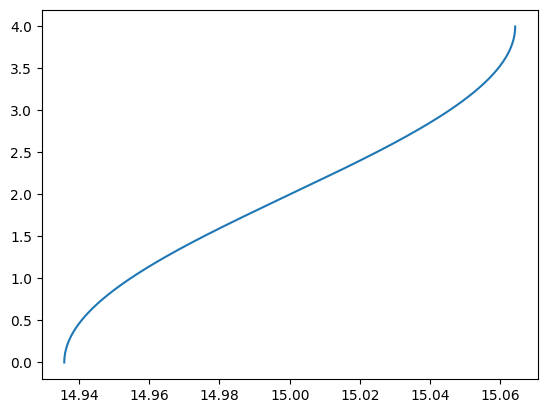

In [ ]:
def expression(n,z,t):
    return ((-1)**(n-1))/(2*n-1)*np.cos((2*n-1)*np.pi*z/zf)*np.exp(-(((2*n-1)*np.pi/zf)**2)*lamda/c*t)

def sumfn(zlist,t):
    sol=[]
    for i,z in enumerate(zlist):
        result = np.sum(expression(np.arange(start, end+1),z,t))
        sol.append(result)
    #print(sol)
    sol1=np.array(sol)
    ans=(((sol1*2/np.pi)+0.5)*Tu)+((0.5-(sol1*2/np.pi))*Tl)
    return ans
#sumfn(expression,z,9)

ans=sumfn(z,15552000)


plt.plot(ans,z)    

plt.show()